In [10]:
import numpy as np
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-08-11/avatar.csv')

df.head()

,id,book,book_num,chapter,chapter_num,character,full_text,character_words,writer,director,imdb_rating
0,1,Water,1,The Boy in the Iceberg,1,Katara,Water. Earth. Fire. Air. My grandmother used t...,Water. Earth. Fire. Air. My grandmother used t...,"‎Michael Dante DiMartino, Bryan Konietzko, Aar...",Dave Filoni,8.1
1,2,Water,1,The Boy in the Iceberg,1,Scene Description,"As the title card fades, the scene opens onto ...",NaN,"‎Michael Dante DiMartino, Bryan Konietzko, Aar...",Dave Filoni,8.1
2,3,Water,1,The Boy in the Iceberg,1,Sokka,It's not getting away from me this time. [Clos...,It's not getting away from me this time. Watc...,"‎Michael Dante DiMartino, Bryan Konietzko, Aar...",Dave Filoni,8.1
3,4,Water,1,The Boy in the Iceberg,1,Scene Description,"The shot pans quickly from the boy to Katara, ...",NaN,"‎Michael Dante DiMartino, Bryan Konietzko, Aar...",Dave Filoni,8.1
4,5,Water,1,The Boy in the Iceberg,1,Katara,"[Happily surprised.] Sokka, look!","Sokka, look!","‎Michael Dante DiMartino, Bryan Konietzko, Aar...",Dave Filoni,8.1


In [2]:
import matplotlib.pyplot as plt

### Looking for who spoke the most overall

In [24]:
df.character.value_counts(normalize = True).head(10)

Scene Description    0.253493
Aang                 0.134180
Sokka                0.122451
Katara               0.107359
Zuko                 0.057975
Toph                 0.037878
Iroh                 0.025177
Azula                0.015764
Jet                  0.010011
Suki                 0.008517
Name: character, dtype: float64

In [14]:
df.book.value_counts(100)

Water    0.345162
Earth    0.329623
Fire     0.325215
Name: book, dtype: float64

### who spoke the most in each book?

In [46]:
for book, grp in df.groupby('book'):
    print('--------------')
    print(f'Book Name: {book}')
    print('--------------')
    print(grp.character.value_counts(100).head(5))

--------------
Book Name: Earth
--------------
Scene Description    0.277879
Sokka                0.113101
Aang                 0.111514
Katara               0.093608
Toph                 0.054850
Name: character, dtype: float64
--------------
Book Name: Fire
--------------
Scene Description    0.240064
Sokka                0.120836
Aang                 0.111647
Zuko                 0.099472
Katara               0.089134
Name: character, dtype: float64
--------------
Book Name: Water
--------------
Scene Description    0.242857
Aang                 0.177056
Katara               0.137662
Sokka                0.132900
Zuko                 0.037662
Name: character, dtype: float64


In [52]:
pip install pycats

  Stored in directory: C:\Users\iutti\AppData\Local\pip\Cache\wheels\73\9b\72\98ece11ce3420a506615b18cec20eb10d76285abb98e50ecce
Successfully built pycats
Note: you may need to restart the kernel to use updated packages.


In [71]:
import pycats 

for book, grp in df.groupby('book'):
    print('--------------')
    print(f'Book Name: {book}')
    print('--------------')
    top_chars = pycats.cat_lump(grp.character.astype('category'), 10)
    top_5 = top_chars.value_counts(100).head(5)[1:]
    print(top_5)

--------------
Book Name: Earth
--------------
Other     0.224841
Sokka     0.113101
Aang      0.111514
Katara    0.093608
Name: character, dtype: float64
--------------
Book Name: Fire
--------------
Other    0.209970
Sokka    0.120836
Aang     0.111647
Zuko     0.099472
Name: character, dtype: float64
--------------
Book Name: Water
--------------
Other     0.183983
Aang      0.177056
Katara    0.137662
Sokka     0.132900
Name: character, dtype: float64


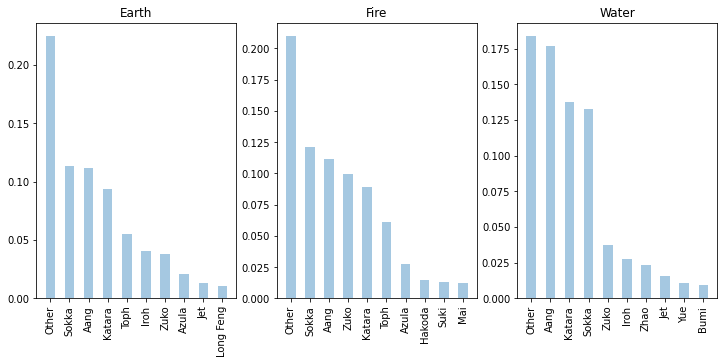

In [109]:
import matplotlib.pyplot as plt 

fig, axes = plt.subplots(1,3, figsize = (10,5))

i = 0

for book, grp in df.groupby('book'):
    top_chars = pycats.cat_lump(grp.character.astype('category'), 10)
    top_5 = top_chars.value_counts(100).head(11)[1:]
    axes[i].bar(top_5.index, top_5, width = 0.5, alpha = 0.4)
    axes[i].set_xticklabels(top_5.index, rotation = 'vertical')
    axes[i].set_title(book)
    i = i+1
fig.tight_layout(pad = 0.5)


### Looking for words spoken the most by Aang 

In [7]:
aang_words = df.loc[df.character == 'Aang','character_words']

In [9]:
aang_words_corpus = []

for word in aang_words:
    aang_words_corpus.append(word)

In [14]:
aang_full_text = ' '.join(aang_words_corpus)

In [4]:
aang_words = df.loc[df.character == 'Aang','character_words']

aang_words_corpus = []

for word in aang_words:
    aang_words_corpus.append(word)
    
aang_full_text = ' '.join(aang_words_corpus)

In [10]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

stop_words = set(stopwords.words('english'))

word_tokens = word_tokenize(aang_full_text)

word_tokens = [w.lower() for w in word_tokens]

aang_words_filt = [w for w in word_tokens if not w in stop_words]

print(aang_words_filt)


['need', 'ask', 'something', '...', 'please', '...', 'come', 'closer', '.', 'go', 'penguin', 'sledding', '?', "'s", 'going', '?', "'m", '...', 'sure', '.', 'appa', '!', 'right', '?', 'wake', ',', 'buddy', '.', 'ha', ',', 'ha', '!', "'re", 'okay', '!', 'appa', ',', 'flying', 'bison', '.', "n't", 'worry', ',', "'ll", 'wash', '.', 'guys', 'live', 'around', '?', "'m", '...', 'a-a-a-achoo', '!', "'m", 'aang', '.', 'really', '?', 'felt', 'higher', '.', 'sure', '!', 'well', ',', 'guys', 'stuck', ',', 'appa', 'give', 'lift', '.', 'okay', ',', 'first', 'time', 'flyers', ',', 'hold', 'tight', '!', 'appa', ',', 'yip-yip', '!', 'come', ',', 'appa', '.', 'yip-yip', '!', 'appa', "'s", 'little', 'tired', '.', 'little', 'rest', "'ll", 'soaring', 'sky', '.', "'ll", 'see', '.', 'oh', ',', 'smiling', '?', 'hey', '.', "what'cha", 'thinkin', "'", '?', 'oh', ',', '.', "n't", 'know', '.', 'mean', ',', 'knew', 'people', 'knew', ',', "n't", '.', 'sorry', '.', 'sleep', 'tight', '.', 'uh', ',', 'looking', 'like'

In [14]:
puncs = ['...','.','!',',','?']

aang_words_filt = [w for w in aang_words_filt if not w in puncs]

print(aang_words_filt)

['need', 'ask', 'something', 'please', 'come', 'closer', 'go', 'penguin', 'sledding', "'s", 'going', "'m", 'sure', 'appa', 'right', 'wake', 'buddy', 'ha', 'ha', "'re", 'okay', 'appa', 'flying', 'bison', "n't", 'worry', "'ll", 'wash', 'guys', 'live', 'around', "'m", 'a-a-a-achoo', "'m", 'aang', 'really', 'felt', 'higher', 'sure', 'well', 'guys', 'stuck', 'appa', 'give', 'lift', 'okay', 'first', 'time', 'flyers', 'hold', 'tight', 'appa', 'yip-yip', 'come', 'appa', 'yip-yip', 'appa', "'s", 'little', 'tired', 'little', 'rest', "'ll", 'soaring', 'sky', "'ll", 'see', 'oh', 'smiling', 'hey', "what'cha", 'thinkin', "'", 'oh', "n't", 'know', 'mean', 'knew', 'people', 'knew', "n't", 'sorry', 'sleep', 'tight', 'uh', 'looking', 'like', 'appa', 'sneeze', 'extinct', "'s", 'stabbing', "'s", 'airbending', 'magic', 'airbending', 'lets', 'control', 'air', 'currents', 'around', 'glider', 'fly', 'check', "'re", 'waterbender', 'see', 'tongue', 'stuck', 'staff', 'wow', 'everything', 'freezes', 'war', 'talki

In [15]:
len(word_tokens)
len(aang_words_filt)
len(aang_words_filt)

9714

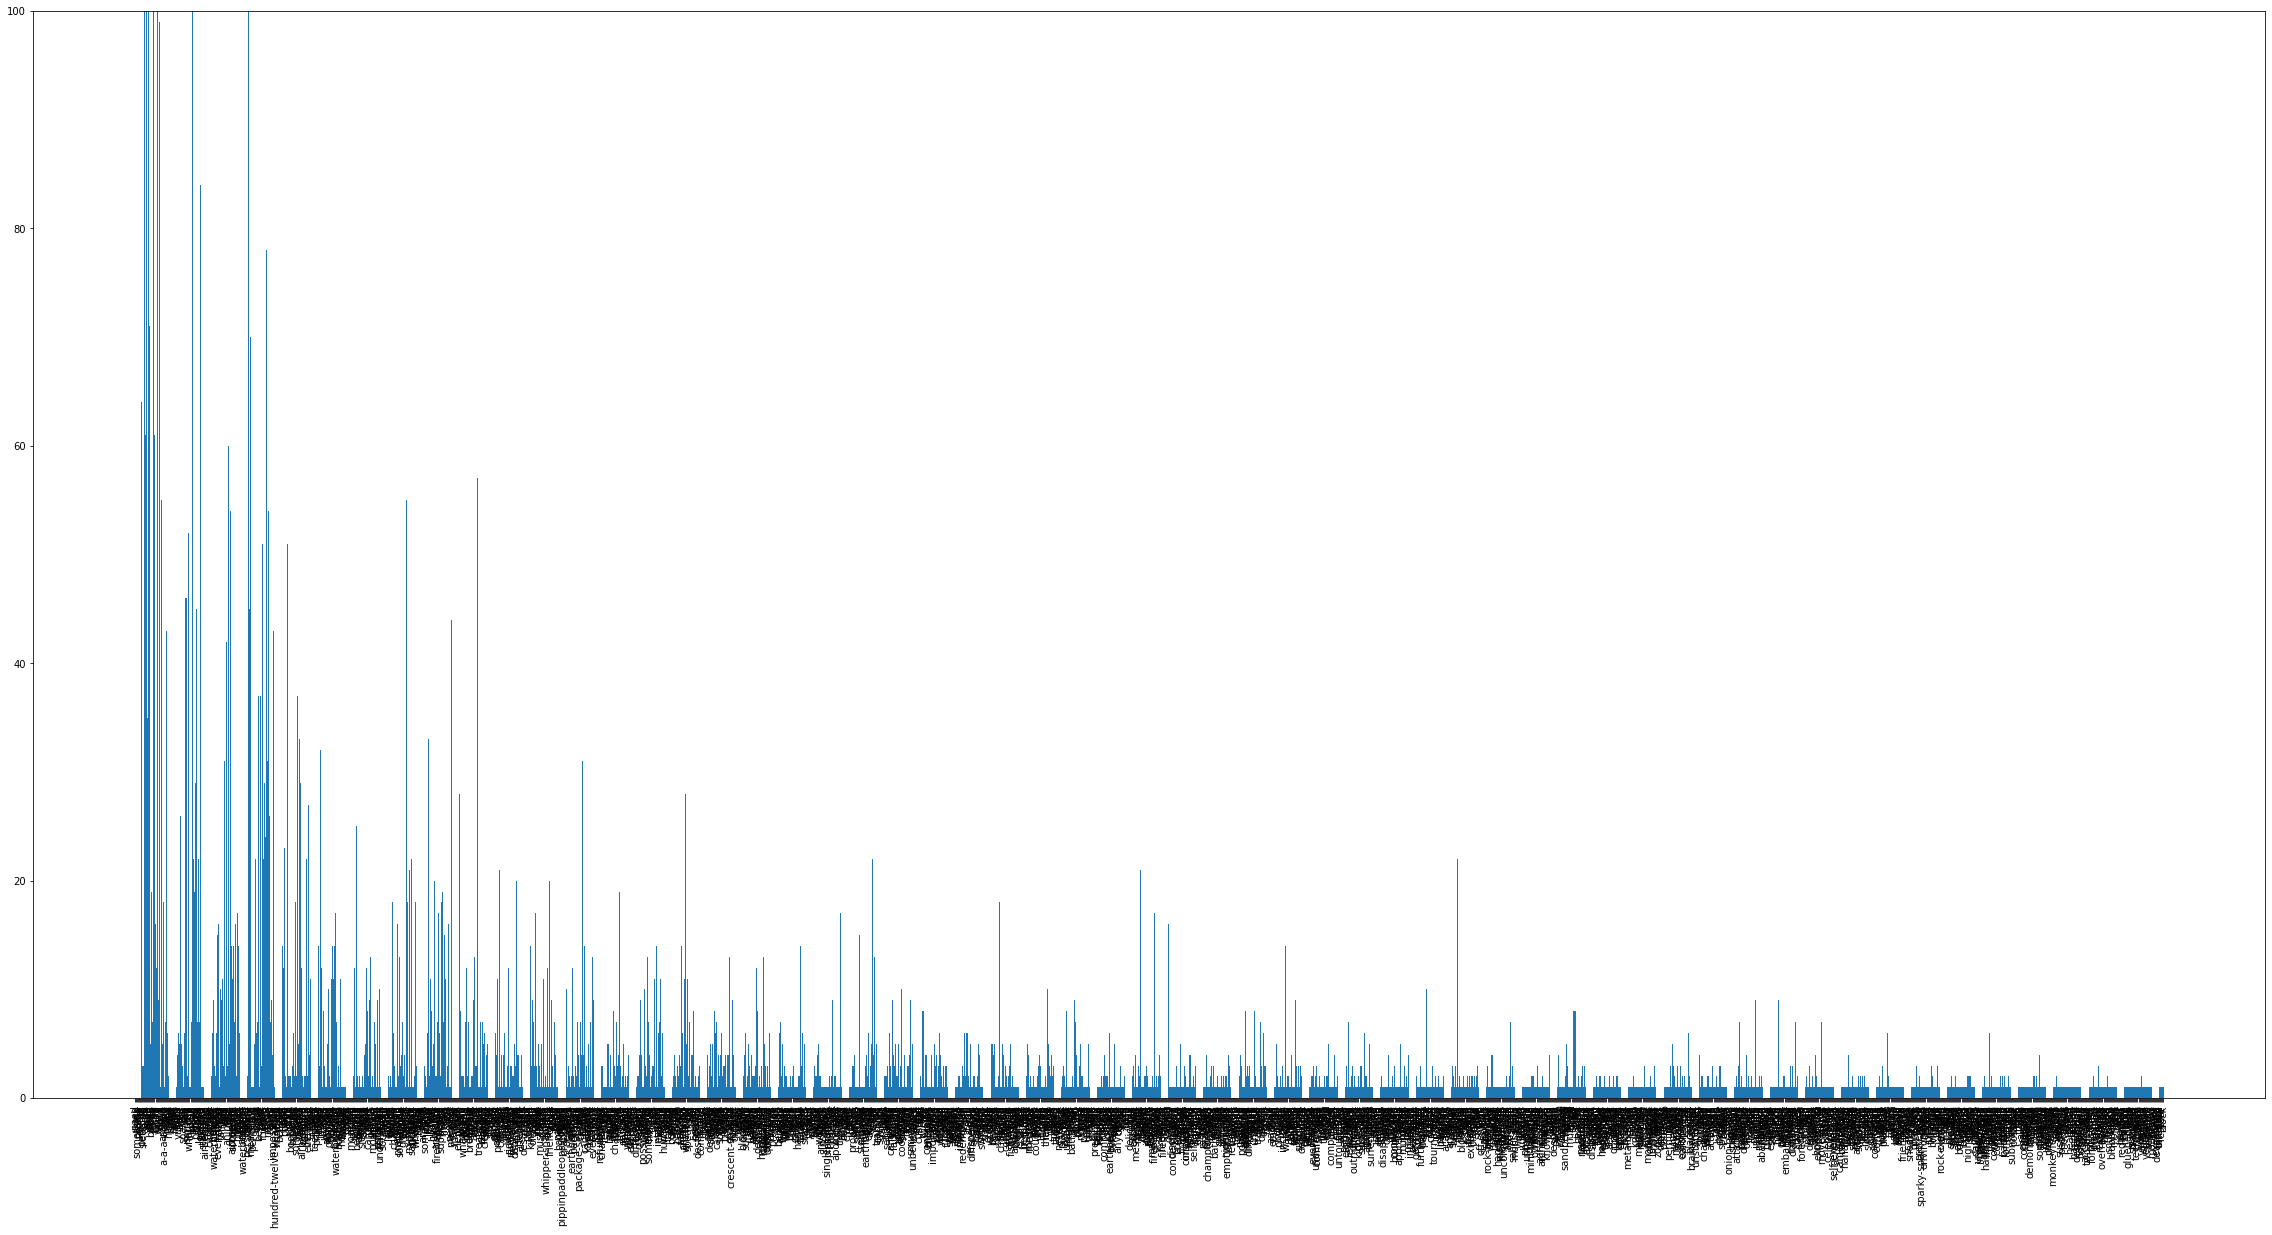

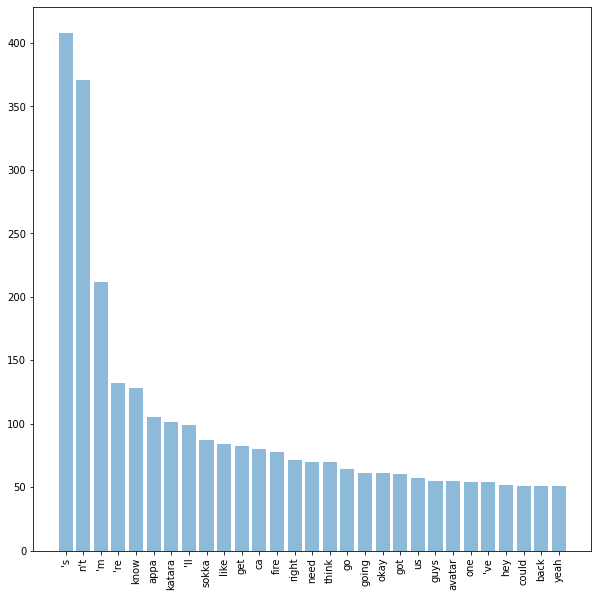

In [21]:
from collections import Counter

aang_words_freqs = Counter(aang_words_filt)


plt.figure(figsize = (40,20))
plt.bar(aang_words_freqs.keys(), aang_words_freqs.values())
plt.ylim((0,100))
plt.xticks(rotation = 90)
plt.show()


aang_words_sorted = {key:val for key,val in sorted(aang_words_freqs.items(), key = lambda x: x[1], reverse = True) 
                     if val > 50}


plt.figure(figsize = (10,10))
plt.bar(aang_words_sorted.keys(), aang_words_sorted.values(), alpha = 0.5)
#plt.ylim((0,100))
plt.xticks(rotation = 90)
plt.show()



In [3]:
pip install textfeatures

Note: you may need to restart the kernel to use updated packages.


In [13]:
import textfeatures as txt


df_mod = df.loc[:, ['book_num','chapter_num','character','full_text','imdb_rating']]

txt.word_count(df_mod, 'full_text','word_count')
txt.avg_word_length(df_mod, 'full_text','avg_word_count')
txt.stopwords_count(df_mod, 'full_text','stopwords_count')


,book_num,chapter_num,character,full_text,imdb_rating,word_count,avg_word_count,stopwords_count
0,1,1,Katara,Water. Earth. Fire. Air. My grandmother used t...,8.1,152,4.519737,61
1,1,1,Scene Description,"As the title card fades, the scene opens onto ...",8.1,211,4.184834,95
2,1,1,Sokka,It's not getting away from me this time. [Clos...,8.1,36,4.277778,19
3,1,1,Scene Description,"The shot pans quickly from the boy to Katara, ...",8.1,171,4.447674,72
4,1,1,Katara,"[Happily surprised.] Sokka, look!",8.1,4,7.500000,0
5,1,1,Sokka,"[Close-up of Sokka; whispering.] Sshh! Katara,...",8.1,42,4.500000,15
6,1,1,Scene Description,"Behind Sokka, Katara is still making circular ...",8.1,46,4.586957,19
7,1,1,Katara,[Struggling with the water that passes right i...,8.1,16,4.562500,5
8,1,1,Scene Description,The bubble containing her fish slowly drifts a...,8.1,63,4.428571,26
9,1,1,Katara,[Exclaims indignantly.] Hey!,8.1,3,8.666667,0


In [15]:
import seaborn as sns

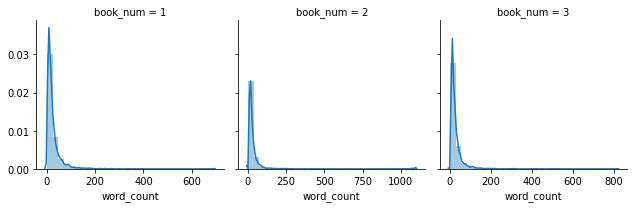

In [19]:
g = sns.FacetGrid(df_mod, sharex = False, col = 'book_num')
g.map(sns.distplot, 'word_count', bins = 30)


In [25]:
chars = list(df_mod.character.unique())

chars.remove('Scene Description')

In [35]:
df_mod.character.replace(to_replace = chars, value = 1, inplace = True)
df_mod.replace('Scene Description', 0, inplace = True)

df_mod.head(10)


,book_num,chapter_num,character,full_text,imdb_rating,word_count,avg_word_count,stopwords_count
0,1,1,1,Water. Earth. Fire. Air. My grandmother used t...,8.1,152,4.519737,61
1,1,1,0,"As the title card fades, the scene opens onto ...",8.1,211,4.184834,95
2,1,1,1,It's not getting away from me this time. [Clos...,8.1,36,4.277778,19
3,1,1,0,"The shot pans quickly from the boy to Katara, ...",8.1,171,4.447674,72
4,1,1,1,"[Happily surprised.] Sokka, look!",8.1,4,7.500000,0
5,1,1,1,"[Close-up of Sokka; whispering.] Sshh! Katara,...",8.1,42,4.500000,15
6,1,1,0,"Behind Sokka, Katara is still making circular ...",8.1,46,4.586957,19
7,1,1,1,[Struggling with the water that passes right i...,8.1,16,4.562500,5
8,1,1,0,The bubble containing her fish slowly drifts a...,8.1,63,4.428571,26
9,1,1,1,[Exclaims indignantly.] Hey!,8.1,3,8.666667,0


C:\Users\iutti\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


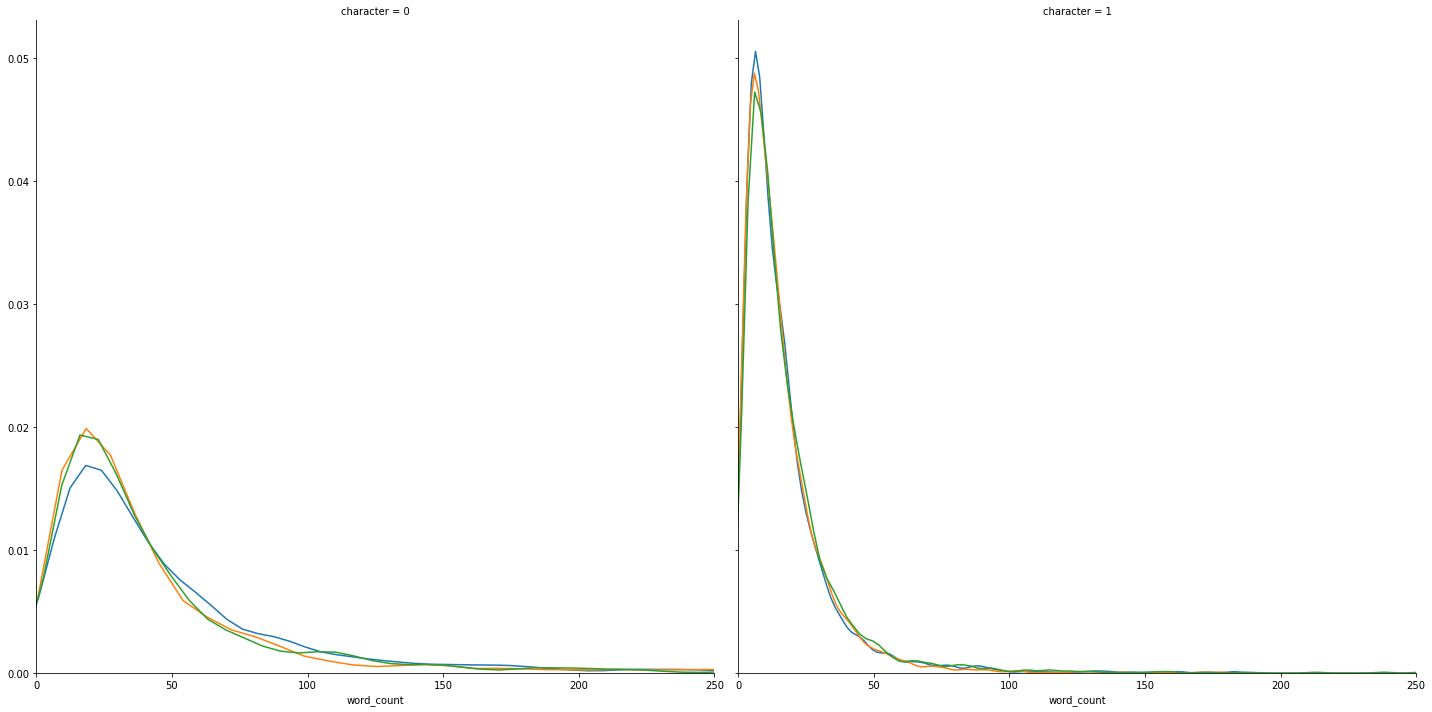

In [44]:
g = sns.FacetGrid(df_mod, sharex = False, col = 'character', hue = 'book_num', size = 10, xlim = (0,250))
g.map(sns.distplot, 'word_count', bins = 30, hist = False)

C:\Users\iutti\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


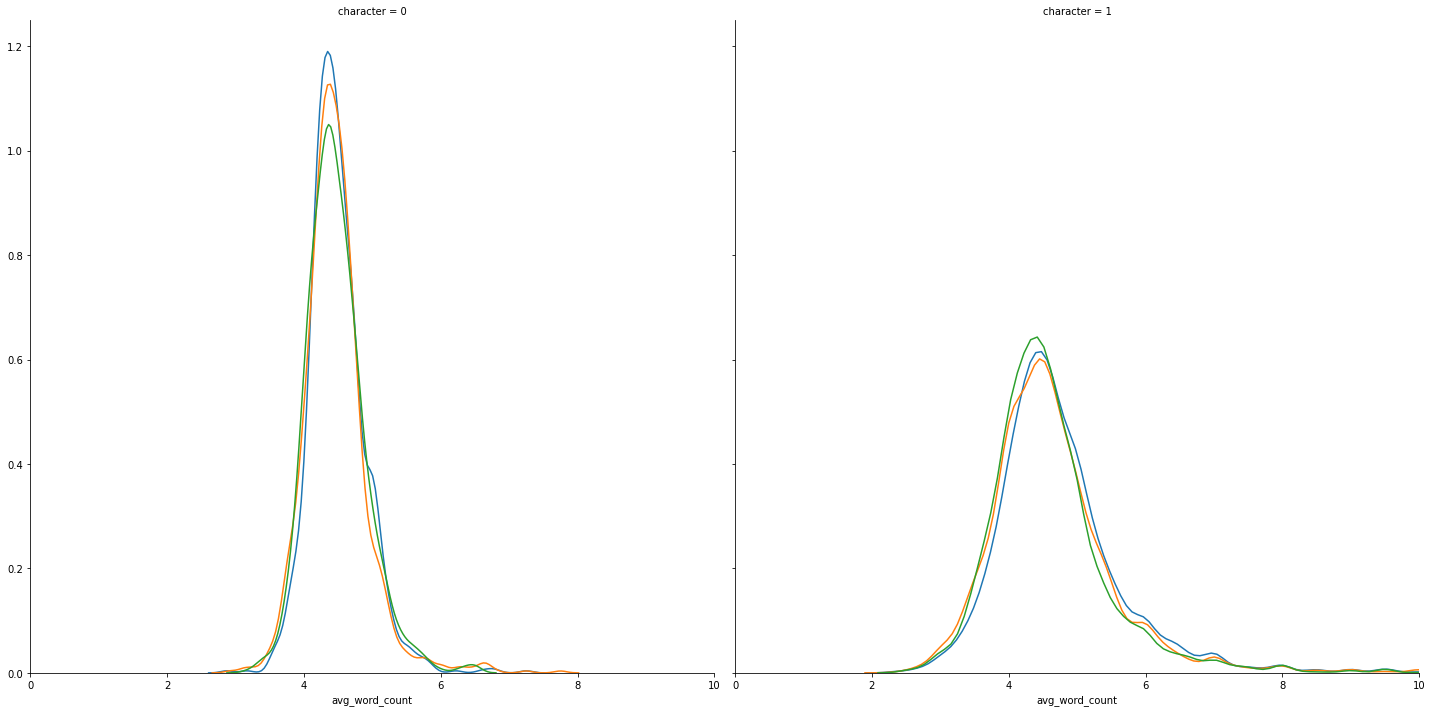

In [46]:
g = sns.FacetGrid(df_mod, sharex = False, col = 'character', hue = 'book_num', size = 10, xlim = (0,10))
g.map(sns.distplot, 'avg_word_count', bins = 30, hist = False)

C:\Users\iutti\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


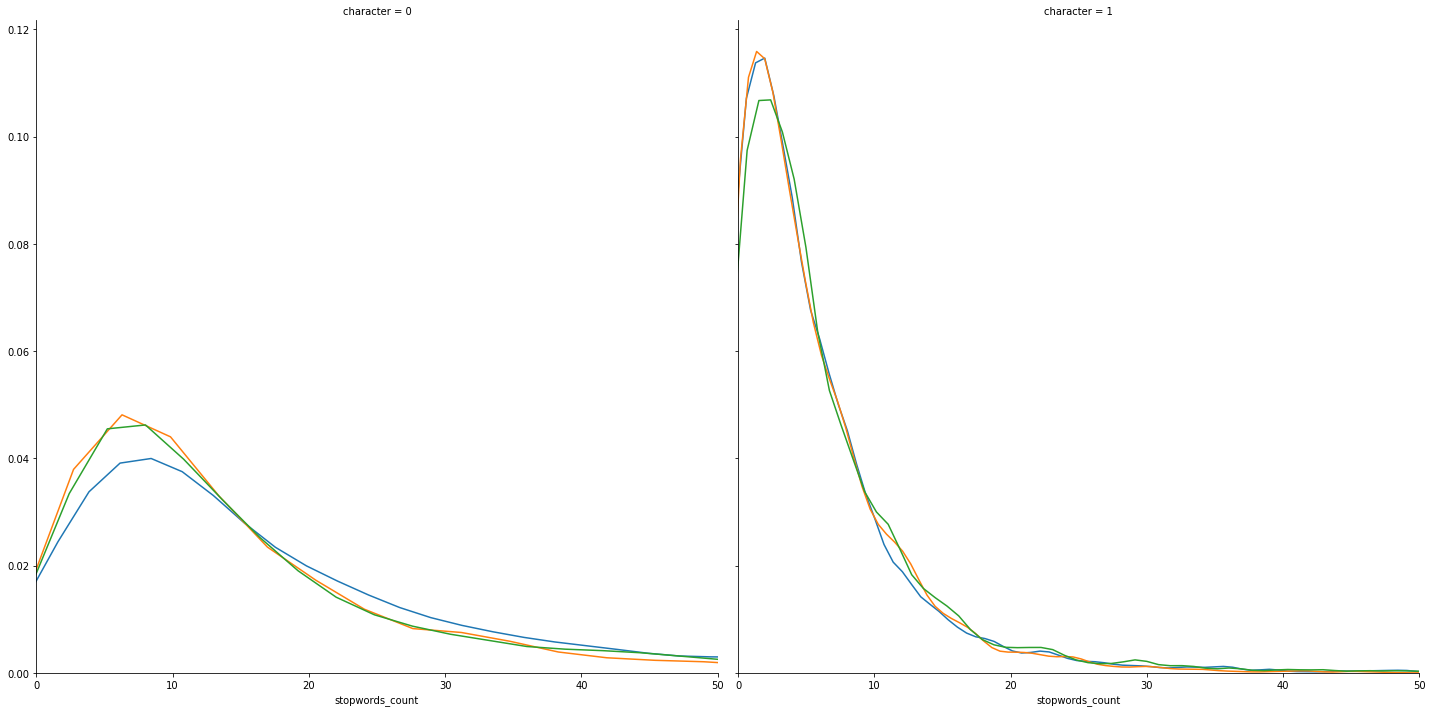

In [48]:
g = sns.FacetGrid(df_mod, sharex = False, col = 'character', hue = 'book_num', size = 10, xlim = (0,50))
g.map(sns.distplot, 'stopwords_count', bins = 30, hist = False)

predict the speaker with these features

- book_num
- chapter_num
- word_count
- avg_word_count
- stopwords_count

In [56]:
X = df_mod.drop(['character', 'full_text','imdb_rating'], axis = 1).values
y = df_mod.character.values

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y)

In [69]:
from sklearn.linear_model import LogisticRegression

lr_g = LogisticRegression(class_weight = {1:0.75,0:0.25})

lr_g.fit(X_train, y_train)
np.round(lr_g.coef_)

C:\Users\iutti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[ 0.,  0.,  0.,  0., -0.]])

In [70]:
lr_g.score(X_test, y_test)

0.7729309829698238

In [64]:
df_mod.character.value_counts(100)

1    0.746507
0    0.253493
Name: character, dtype: float64